In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

In [2]:
data = pd.read_csv('BC.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1, "B":0})

In [7]:
data.shape

(569, 32)

In [8]:
x = data.pop('diagnosis')

In [9]:
target = x.values
inputs = data.iloc[:, 1:].values

In [10]:
zeros = 0
ones = np.sum(target)
indices_to_remove = []

for i in range(inputs.shape[0]):
    if target[i]==0:
        zeros+=1
        if zeros>ones:
            indices_to_remove.append(i)

In [11]:
input_data = np.delete(inputs, indices_to_remove,  axis = 0)
output_data = np.delete(target, indices_to_remove, axis = 0)

In [12]:
sample_count = output_data.shape[0]
shuffled_inputs = np.arange(sample_count)
np.random.shuffle(shuffled_inputs)

In [13]:
inputs = input_data[shuffled_inputs]
targets = output_data[shuffled_inputs]

In [14]:
shape = inputs.shape[0]
train_count = int(0.8*shape)
valid_count = int(0.1*shape)
test_count = int(0.1*shape)

train_inputs = inputs[:train_count]
train_targets = targets[:train_count]

valid_inputs = inputs[train_count:train_count+valid_count]
valid_targets = targets[train_count:train_count+valid_count]

test_inputs = inputs[-test_count:]
test_targets = targets[-test_count:]

print(np.sum(train_targets), train_count, np.sum(train_targets)/train_count)
print(np.sum(valid_targets), valid_count, np.sum(valid_targets)/valid_count)
print(np.sum(test_targets), test_count, np.sum(test_targets)/test_count)

169 339 0.49852507374631266
19 42 0.4523809523809524
23 42 0.5476190476190477


In [15]:
train_inputs.ndim

2

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

train_scaled_inputs = scale.fit_transform(train_inputs)
valid_scaled_inputs = scale.transform(valid_inputs)
test_scaled_inputs = scale.transform(test_inputs)

In [17]:
np.savez("BC_train_1", inputs = train_scaled_inputs, targets = train_targets)
np.savez("BC_valid_1", inputs = valid_scaled_inputs, targets = valid_targets)
np.savez("BC_test_1", inputs = test_scaled_inputs, targets = test_targets)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [19]:
train = np.load("BC_train_1.npz")
valid= np.load("BC_valid_1.npz")


In [20]:
model = Sequential()
model.add(Dense(20, input_dim = train['inputs'].shape[1],
                activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid', ))

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(x = train['inputs'], 
         y = train['targets'], 
         batch_size = 50, 
         epochs = 80, 
         validation_data = (valid['inputs'], valid['targets']))

Train on 339 samples, validate on 42 samples
Epoch 1/80
339/339 [==============================] - 1s 3ms/step - loss: 0.8296 - accuracy: 0.4897 - val_loss: 0.6807 - val_accuracy: 0.5952
Epoch 2/80
339/339 [==============================] - 0s 112us/step - loss: 0.7580 - accuracy: 0.5221 - val_loss: 0.6593 - val_accuracy: 0.7143
Epoch 3/80
339/339 [==============================] - 0s 230us/step - loss: 0.7107 - accuracy: 0.5900 - val_loss: 0.6439 - val_accuracy: 0.8333
Epoch 4/80
339/339 [==============================] - 0s 138us/step - loss: 0.6656 - accuracy: 0.6018 - val_loss: 0.6314 - val_accuracy: 0.9524
Epoch 5/80
339/339 [==============================] - 0s 204us/step - loss: 0.6438 - accuracy: 0.6165 - val_loss: 0.6159 - val_accuracy: 0.9762
Epoch 6/80
339/339 [==============================] - 0s 138us/step - loss: 0.6418 - accuracy: 0.6254 - val_loss: 0.5989 - val_accuracy: 0.9286
Epoch 7/80
339/339 [==============================] - 0s 92us/step - loss: 0.6077 - accuracy:

339/339 [==============================] - 0s 296us/step - loss: 0.1760 - accuracy: 0.9381 - val_loss: 0.1017 - val_accuracy: 0.9762
Epoch 58/80
339/339 [==============================] - ETA: 0s - loss: 0.1929 - accuracy: 0.96 - 0s 250us/step - loss: 0.1655 - accuracy: 0.9528 - val_loss: 0.1001 - val_accuracy: 0.9762
Epoch 59/80
339/339 [==============================] - 0s 204us/step - loss: 0.1668 - accuracy: 0.9381 - val_loss: 0.0980 - val_accuracy: 0.9762
Epoch 60/80
339/339 [==============================] - 0s 204us/step - loss: 0.1254 - accuracy: 0.9558 - val_loss: 0.0972 - val_accuracy: 0.9762
Epoch 61/80
339/339 [==============================] - 0s 250us/step - loss: 0.1148 - accuracy: 0.9617 - val_loss: 0.0971 - val_accuracy: 0.9762
Epoch 62/80
339/339 [==============================] - 0s 231us/step - loss: 0.1539 - accuracy: 0.9469 - val_loss: 0.0967 - val_accuracy: 0.9762
Epoch 63/80
339/339 [==============================] - 0s 204us/step - loss: 0.1619 - accuracy: 0.94

In [23]:
score_history = model.history.history

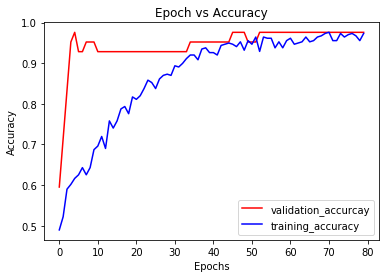

In [24]:
pt.title("Epoch vs Accuracy")

pt.xlabel("Epochs")
pt.ylabel("Accuracy")
pt.plot(model.history.epoch, score_history['val_accuracy'], c = 'red', label = 'validation_accurcay')
pt.plot(model.history.epoch, score_history['accuracy'], c = 'blue', label = 'training_accuracy')
pt.legend()
pt.show()

In [25]:
max(score_history['val_accuracy'])

0.976190447807312

In [26]:
test = np.load("BC_test_0.npz")
model.evaluate(test['inputs'], test['targets'], verbose = 0)

[0.01258229551881197, 1.0]

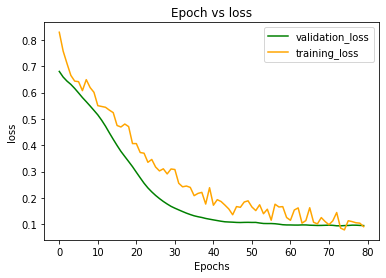

In [27]:
pt.title("Epoch vs loss")

pt.xlabel("Epochs")
pt.ylabel("loss")
pt.plot(model.history.epoch, score_history['val_loss'], c = 'green', label = 'validation_loss')
pt.plot(model.history.epoch, score_history['loss'], c = 'orange', label = 'training_loss')
pt.legend()
pt.show()

In [52]:
min(score_history['loss'])

0.07828442572140765

In [51]:
min(score_history['val_loss'])

0.09383538365364075

In [55]:
np.set_printoptions(suppress = True)

In [63]:
check = input_data[0]-min(input_data[0])
check = check.reshape(1, -1)
check = scale.transform(check)

model.predict(check)

array([[1.]], dtype=float32)

In [73]:
model.save('breast_cancer_model.h5')

In [45]:
u = np.array(np.where(output_data==0)).flatten()

In [47]:
for i in u:
    test = input_data[i , :]
    test = test.reshape(1, -1)
    test = scale.transform(test)
    prediciton_prob = model.predict(test)
    result = 0 if prediciton_prob<0.5 else 1
    print("Probability is : "+str(prediciton_prob)+" Patient Diagnosis class: "+str(result))

Probability is : [[0.00976085]] Patient Diagnosis class: 0
Probability is : [[0.00283509]] Patient Diagnosis class: 0
Probability is : [[2.6455461e-06]] Patient Diagnosis class: 0
Probability is : [[0.00026044]] Patient Diagnosis class: 0
Probability is : [[5.786155e-07]] Patient Diagnosis class: 0
Probability is : [[0.00132987]] Patient Diagnosis class: 0
Probability is : [[0.2187973]] Patient Diagnosis class: 0
Probability is : [[0.0004337]] Patient Diagnosis class: 0
Probability is : [[0.0007406]] Patient Diagnosis class: 0
Probability is : [[7.30579e-05]] Patient Diagnosis class: 0
Probability is : [[0.00029514]] Patient Diagnosis class: 0
Probability is : [[0.0001243]] Patient Diagnosis class: 0
Probability is : [[3.392393e-07]] Patient Diagnosis class: 0
Probability is : [[1.9315401e-05]] Patient Diagnosis class: 0
Probability is : [[8.3000596e-05]] Patient Diagnosis class: 0
Probability is : [[6.0689933e-07]] Patient Diagnosis class: 0
Probability is : [[0.00044651]] Patient Dia

Probability is : [[0.00487202]] Patient Diagnosis class: 0
Probability is : [[0.00022006]] Patient Diagnosis class: 0
Probability is : [[0.00062607]] Patient Diagnosis class: 0
Probability is : [[0.00057088]] Patient Diagnosis class: 0
Probability is : [[2.6525859e-05]] Patient Diagnosis class: 0
Probability is : [[0.005292]] Patient Diagnosis class: 0
Probability is : [[8.623889e-05]] Patient Diagnosis class: 0
Probability is : [[1.4898602e-05]] Patient Diagnosis class: 0
Probability is : [[0.00031318]] Patient Diagnosis class: 0
Probability is : [[2.7280797e-05]] Patient Diagnosis class: 0
Probability is : [[0.00025504]] Patient Diagnosis class: 0
Probability is : [[0.12460601]] Patient Diagnosis class: 0
Probability is : [[2.2251974e-05]] Patient Diagnosis class: 0
Probability is : [[0.00017216]] Patient Diagnosis class: 0
Probability is : [[0.00054917]] Patient Diagnosis class: 0
Probability is : [[1.0102226e-06]] Patient Diagnosis class: 0
Probability is : [[0.00048084]] Patient D

In [48]:
v = np.array(np.where(output_data==1)).flatten()

In [50]:
for i in v:
    test = input_data[i , :]
    test = test.reshape(1, -1)
    test = scale.transform(test)
    prediciton_prob = model.predict(test)
    result = 0 if prediciton_prob<0.5 else 1
    print("Probability is : "+str(prediciton_prob)+" Patient Diagnosis class: "+str(result))

Probability is : [[1.]] Patient Diagnosis class: 1
Probability is : [[0.99995744]] Patient Diagnosis class: 1
Probability is : [[1.]] Patient Diagnosis class: 1
Probability is : [[0.9999882]] Patient Diagnosis class: 1
Probability is : [[0.99992]] Patient Diagnosis class: 1
Probability is : [[0.99687517]] Patient Diagnosis class: 1
Probability is : [[0.99999213]] Patient Diagnosis class: 1
Probability is : [[0.9886255]] Patient Diagnosis class: 1
Probability is : [[0.9999466]] Patient Diagnosis class: 1
Probability is : [[1.]] Patient Diagnosis class: 1
Probability is : [[0.9812284]] Patient Diagnosis class: 1
Probability is : [[0.9998323]] Patient Diagnosis class: 1
Probability is : [[0.9999877]] Patient Diagnosis class: 1
Probability is : [[0.80446786]] Patient Diagnosis class: 1
Probability is : [[0.9999025]] Patient Diagnosis class: 1
Probability is : [[0.99999964]] Patient Diagnosis class: 1
Probability is : [[0.9971589]] Patient Diagnosis class: 1
Probability is : [[0.9999989]] P

Probability is : [[0.9999987]] Patient Diagnosis class: 1
Probability is : [[0.9999231]] Patient Diagnosis class: 1
Probability is : [[0.9999999]] Patient Diagnosis class: 1
Probability is : [[0.9999939]] Patient Diagnosis class: 1
Probability is : [[0.8956464]] Patient Diagnosis class: 1
Probability is : [[0.9999877]] Patient Diagnosis class: 1
Probability is : [[0.999998]] Patient Diagnosis class: 1
Probability is : [[1.]] Patient Diagnosis class: 1
Probability is : [[1.]] Patient Diagnosis class: 1
Probability is : [[0.9999298]] Patient Diagnosis class: 1
Probability is : [[0.9784158]] Patient Diagnosis class: 1
Probability is : [[0.9999999]] Patient Diagnosis class: 1
Probability is : [[0.99997354]] Patient Diagnosis class: 1
Probability is : [[0.99999976]] Patient Diagnosis class: 1
Probability is : [[0.99999845]] Patient Diagnosis class: 1
Probability is : [[0.9967982]] Patient Diagnosis class: 1
Probability is : [[0.99999166]] Patient Diagnosis class: 1
Probability is : [[0.9959

In [81]:
l = [1, 2, 3, 4, 5]
l.pop(2)

3

In [82]:
l

[1, 2, 4, 5]

In [84]:
s = {1, 2, 3, 4}

In [90]:
s.remove(1)

In [87]:
s.discard(0)

In [88]:
s

{1, 2, 3, 4}

In [91]:
s

{2, 3, 4}

In [92]:
l

[1, 2, 4, 5]

In [97]:
l.extend([[5]])

In [98]:
l

[1, 2, 4, 5, 5, [5]]